In [1]:
# Importing Library

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt


In [2]:
# Using data

data = load_breast_cancer()
X = data.data
Y = data.target

Feature = data.feature_names
df = pd.DataFrame(data=X, columns=Feature)
df['Target'] = Y

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
# Functions

def Rand(size):
    _Rand = np.random.rand(size)
    return _Rand

def Sigmoid(input_):
    _Sigmoid = (2 / (1 + np.exp(-input_)) ) - 1
    return _Sigmoid

def tanh(_input):
    return np.tanh(x)

def ReLU(_input):
    if _input < 0:
        return 0
    else:
        return 0.01 * _input
    
def O(feature, weight, fcn):
    if fcn == 'sigmoid':
        return Sigmoid(np.dot(feature, weight))
    elif fcn == 'tanh':
        return tanh(np.dot(feature, weight))
    elif fcn == 'ReLU':
        return ReLU(np.dot(feature, weight))
    else:
        return -1



In [4]:
# Hyper_params

w = Rand(X.shape[1])
learning_rate = 0.1
E_max = 1e6
E = 0
epoch = 20

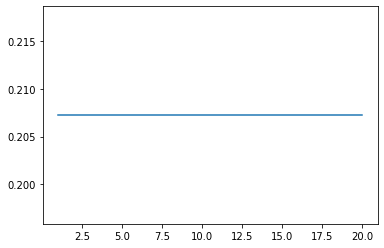

In [5]:
n_learning = int(np.round(X.shape[0] * .75))
e_lst = []
for j in range(epoch):
    E = 0
    for i in range(n_learning):
        o = O(X[i], w, 'sigmoid')
        w += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * X[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
#         print(E)
        if(E > E_max):
            break
    e_lst.append(E / n_learning)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst)

In [6]:
# normalizing

scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(X)
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=data.feature_names)
scaled_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


0.4983981239986026
0.9661085887055619
1.4583078626401613
1.9571986299016633
2.441003650965352
2.9257297958828254
3.3947417652804637
3.877139541944551
4.364681480385753
4.862852595450909
5.287052981387645
5.767120116789916
6.265318696786731
6.716430231616402
7.2097271127024625
7.701887173461516
8.148651331429885
8.639129669153096
9.126858242198157
9.132426748023494
9.137794235724972
9.153640406063316
9.64385108644767
10.126664732526162
10.616689201198161
11.111704488648982
11.59723989852609
12.07923386992586
12.568163391070616
13.029613926658492
13.523579174811626
14.010635669061084
14.501161442353288
14.992167522036722
15.47280178394086
15.95037728570854
16.418267497613613
16.437432994502508
16.85405465447975
17.30749740512503
17.662844411822014
18.11601727820728
18.61432699523164
19.07348459760498
19.5003928744041
19.989188945446557
20.017853923861963
20.486827932721848
20.497029495876706
20.504704472206274
20.523614699985504
20.545890555644412
20.569351665851578
21.048810071751397
21

55.240175346624554
55.40018737057694
55.58663170545801
55.77722326352305
55.932159054261035
56.10535702415706
56.36787337752649
56.41420299466814
56.636101944525755
56.717426599719865
57.01843405154605
57.097051500379266
57.196784919681
57.26979220001855
57.44246747945201
57.51903834515485
57.7985429237213
58.00388303177277
58.09015797688612
58.32217719482786
58.43025679408474
58.57428045447955
58.576815946583366
58.774647558018486
58.94495710565377
59.03457673808263
59.03932149301689
59.1150563097805
59.135446996558834
59.20638822582206
59.300652943957374
59.5467894525261
59.6675203995522
59.760996003166056
59.905716719931014
60.04822622080797
60.25922826099609
60.583211546148604
60.69496208721273
60.752115315068714
60.77247622790458
60.87969412376927
60.965182249775516
61.17475915289451
61.24616172972179
61.480035402497435
61.530865967083855
61.63607756143389
61.745218946654425
61.79975589484732
61.86418457115917
62.063495469485346
62.129834192750344
62.138383125708344
62.22864990798

23.776179021229357
23.826877882330717
23.850347821664744
23.908798184005757
23.956299670221238
24.09190198850773
24.40119130195359
24.40472344877548
24.44843111266188
24.449578290831862
24.47051071190587
24.48879072504966
24.550210351523628
24.576736933284725
24.6848264784663
24.696174100436128
24.756883315597403
24.873983040961434
24.91756770653083
24.944221738455152
24.98387904807918
24.997030451093178
24.998158565433783
25.020739553057805
25.1691030809539
25.191239816598845
25.195403076092447
25.241775741820756
25.45960362874133
25.652749704327846
25.88769165011759
25.932127398148566
25.992559796717714
26.019309033610657
26.065967177165778
26.08200267656454
26.096379578895302
26.15175131663495
26.18612324402731
26.211048958916717
26.28029556499047
26.360010270902137
26.389811032929316
26.471885181057
26.52879458694235
26.529785944982642
26.632955657805248
26.699353524356177
26.823968906882197
26.824453596047952
26.827803054443457
26.887139818752694
26.95884284895404
26.9985558539231

26.663697207268513
26.898042379519588
26.91974613389508
26.920307895221463
26.995800875634075
27.011001798372778
27.02470669339861
27.074927510357714
27.183515097990295
27.30601563694243
27.36658709233536
27.388875945595775
27.401275537148425
27.465295859780056
27.498674879436646
27.53458669691976
27.560018706586483
27.57376625524093
27.66617792123104
27.686696283620588
27.795987445061748
27.81951053642998
27.86172991974663
27.87814812942936
27.899547014399555
27.96584358328691
28.317933440203817
28.32400228632329
28.324485983116116
28.468115250282857
28.501537156659616
28.50708849128233
28.52317306830111
28.54027376624661
28.59208594914686
28.742574452816058
28.743079872060704
28.756401282888845
28.76950301544552
0.006249098387464647
0.08271749244087588
0.08930883750852799
0.5192715603011614
0.5642622261809658
0.8084323495992178
0.8228053539317988
1.1581223828372607
1.292121238656019
1.3996864434339764
1.5520974605362277
1.5962992498870843
1.8522221207712344
1.9929091098875995
2.01743

23.41732522180059
23.43699646184562
23.48992534636552
23.549138208299183
23.59432934872786
23.63709094123483
23.691229921956893
23.69159297878593
23.83900766104234
23.865736447381636
23.939308614451157
23.943817104172528
23.94599459444032
23.987952796226846
24.035237450970754
24.078178583416484
24.119479554553564
24.169910701302484
24.272058685178514
24.29734901362874
24.334025163114376
24.451674739470555
24.473936706171685
24.616872210472177
24.744758846090743
24.833606403306728
24.89524454978829
24.91014420221236
25.13926507775602
25.157889978804043
25.158417573383165
25.205834442975593
25.235998015546603
25.249633298993345
25.293417410296374
25.407477638864975
25.523210855338856
25.57694395050935
25.59765242862565
25.6007499772972
25.65833273878129
25.687369943783555
25.71802504386904
25.738774645874813
25.7529368864956
25.82437261859481
25.84338032828269
25.95379758157377
25.97902334892562
26.028920581022437
26.045173245134613
26.066768019524577
26.133370406332148
26.48080990842004

21.38294201358566
21.399897576428135
21.401602803292395
21.433772420991893
21.59226049383862
21.824337212724338
22.010244507250775
22.036997635946445
22.091077680392978
22.116426218812293
22.145683398080738
22.160963677971015
22.176148345985006
22.2120872059596
22.241502809380066
22.25930986684903
22.305666050042777
22.356196007157063
22.41429532443224
22.441277874578606
22.495313904704933
22.495472031086432
22.651696629151647
22.666208124580642
22.719977633953285
22.73304181254118
22.733945485824435
22.76946892092976
22.80532941579416
22.840548336765185
22.88303210603002
22.926927507811254
22.991523886502154
23.018045500255557
23.052577928474744
23.165166436137035
23.185079319024364
23.31094159641109
23.420576160296267
23.499369777582892
23.547895737975498
23.558789982756878
23.784065388271955
23.800695667438134
23.801231607017932
23.830764591698955
23.870108134228026
23.88440301227561
23.924113527330295
24.041981264983185
24.14955865501991
24.197065110312593
24.216934047228044
24.217

2.7972328084813523
2.8553087474491434
2.8838830943417757
2.9100100758776386
2.995613976065849
3.0033822467167943
3.084761019971554
3.0891788370416533
3.0938983497202512
3.3768601877085853
3.3924409946533
3.509076050439814
3.8087541373353373
3.8128184208833673
3.8199142991083055
3.86139835542879
3.895208992195479
3.940902793761317
4.138831616015652
4.154981117699489
4.201769820865688
4.61031230884804
4.612312407115182
4.614584766606572
4.614636340518868
4.6147743738542255
4.618850955108836
4.619203101886414
4.655222783464542
4.882426395969069
4.908335827532884
4.938119159883591
5.085543205905587
5.157654789794336
5.325883098076644
5.332321378278073
5.4145262019602844
5.4985131333644075
5.510575268692527
5.514072933327683
5.5141414708850975
5.525991780436915
5.53357543315307
5.546766400327002
5.557302461862398
5.563196654182816
5.595804525494772
5.6716514137265595
5.675223483078327
5.6821085095008295
5.7007168579142595
5.7129476748855526
5.735531211567273
5.806453339571149
5.821531600520

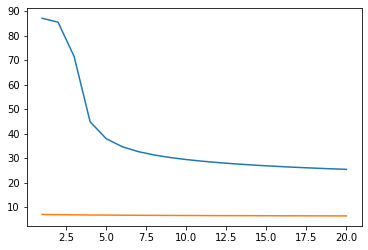

In [7]:
# Training:

e_lst_learn = []
for j in range(epoch):
    E = 0
    for i in range(n_learning):
        o = O(scaled_df.iloc[i], w, 'sigmoid')
        w += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * scaled_df.iloc[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
        print(E)
#         print(w)
        if(E > E_max):
            break
    e_lst_learn.append(E)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst_learn)

# Test:

e_lst_test = []
for j in range(epoch):
    E = 0
    for i in range(n_learning, 569):
        o = O(scaled_df.iloc[i], w, 'sigmoid')
        w += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * scaled_df.iloc[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
        print(E)
#         print(w)
        if(E > E_max):
            break
    e_lst_test.append(E)

plt.plot(iteration, e_lst_test)


0.49352219450366924
0.9074271001067138
1.386025650221664
1.8839138842966259
2.3172090901710454
2.7788654335135154
3.2044247027268344
3.6568134757958837
4.132155656794598
4.6243831303202505
4.969538316783275
5.4128837545531745
5.906058629631674
6.298519046733366
6.778288559155277
7.2535432009553125
7.630263787919832
8.100347370659007
8.547651284625385
8.575319339969065
8.599296726190866
8.668961083139193
9.146356508486964
9.583483080364223
10.0455430351232
10.528044681745627
10.994958668097633
11.415203672301423
11.880067341911852
12.253115297218027
12.723063170408784
13.178659174749637
13.63939573735384
14.09459371060227
14.527048321906623
14.965637295941706
15.36551461623308
15.469883039836606
15.674573342149731
16.051203766075904
16.2816628053553
16.651691206159704
17.142068738922156
17.520015026207815
17.840794196481685
18.279443735070252
18.39983559352717
18.797755293362297
18.887682575720522
18.927263201400272
19.03248626122069
19.15600777227197
19.258626392093895
19.6693674338543

5.850185815533845
5.856979925635902
5.8972223525973755
6.06960824865884
6.07636402242026
6.087849965763522
6.11581491186658
6.121628412812024
6.156846775324002
6.161266718125303
6.385008565501737
6.4232110794218045
6.4597055856372485
6.486721095108024
6.556319995876662
6.625031736268169
6.6533960828075935
6.8155668922972765
6.875831012962491
6.9757278656541475
6.983517477964122
6.99975549030314
7.041991707160837
7.1364956508030435
7.260393999725903
7.2859687653142435
7.530008977051327
7.559274438634745
7.5928644257504905
7.770078915960774
7.800058240631595
7.805340838880119
7.906597506112694
7.923640503990048
7.9765557511813014
7.996123553995677
8.004758509837183
8.257143180459794
8.299700160695604
8.459895105975885
8.510134065380674
8.524761426498927
8.53976099044998
8.553811640669467
8.565822993782078
8.60682827770491
8.636715316198272
8.656304311985698
8.740183664751202
8.765886294573061
8.781185846660856
8.797427310888061
8.821822872031543
8.903282871436042
8.925903021573077
8.9477

17.766050949095035
17.817675555213462
17.849169331933403
17.872361298438445
17.903880464054094
17.95433319923172
17.97980696543586
17.99239057090836
18.02203720907261
18.049285097273554
18.088697881057744
18.273797070567944
18.299406531591867
18.31729927345039
18.330334163631882
18.401899184545748
18.41046696747024
18.412641880532284
18.43299811278406
18.515252532763018
18.5313012507806
18.55502149981286
18.6306394084441
18.65856420345101
18.673215728555505
18.68655550987834
18.693442307932326
18.713316265052846
18.725542501850406
18.741308076185824
18.748759781378084
18.760032361190284
18.806261746490467
18.816448035292144
18.886099513920946
18.901611533031257
18.924653770846795
18.93563280813005
18.94179376998704
18.998107362168902
19.319267790513056
19.329364122186657
19.332204087018177
19.397011507610102
19.412027294194374
19.417780070295123
19.43118192321897
19.460716575014985
19.484722047124297
19.55130456662686
19.553593244482432
19.55931193854512
19.569521798557
0.0001776347079

17.336252056018406
17.369864650882267
17.544971065915263
17.56704984665671
17.581824049089004
17.592773404271117
17.652639756532555
17.660203891590854
17.66230246657725
17.677678031907174
17.761366054242067
17.777605483285978
17.799802785391428
17.87691036765778
17.901131076240034
17.91354571323631
17.926046960861818
17.932796477938187
17.950374242103887
17.961766930949413
17.97655734457881
17.983079990365585
17.99436051919923
18.035272496567366
18.0448839375786
18.111768203729262
18.128610688661052
18.153851595073192
18.164965211248706
18.17065578545642
18.22882650780576
18.53751041071136
18.548305922975143
18.551714093171576
18.60982914585044
18.622971679593885
18.629077798343868
18.642457391833815
18.66875150190436
18.691837958663687
18.755930762863567
18.75844256319373
18.763984478891253
18.77373241347788
1.7265349024388196e-05
0.07409847679327042
0.07415285917916278
0.2879660951500398
0.32575517363039774
0.45817224235829984
0.470446097274145
0.6395172898866082
0.6695454723259705
0

3.411317526972828
3.4440276778944066
3.4644234281674553
3.4646021779278926
3.500897638321025
3.5382571601265513
3.5615395758888666
3.7273424602368777
4.028773033328547
4.049313581240588
4.074014555593274
4.1068684428534015
4.2602862991427095
4.267725611895516
4.3325007533931235
4.405940869246903
4.443577509274549
4.57151236605586
4.625440735387333
4.661527115166864
4.667882817514413
4.674833502814803
4.6869011796667674
4.69310934144614
4.716697181090921
4.818636503464632
4.920232958159761
4.921830129452
4.960836187319352
5.0038617013574775
5.011272918937705
5.032014052414656
5.103472072921317
5.141583555613258
5.404508503838367
5.445074662637457
5.4509331825297
5.488813348160757
5.5922000014444535
5.598064738470808
5.608579741149095
5.634387987492149
5.637705300391068
5.658682357352787
5.659173272208187
5.857112804909864
5.882637337987738
5.9244496567698
5.95581844601715
6.001548200932585
6.04322242616402
6.061793294121212
6.190003323110231
6.274102156952864
6.360677805067415
6.3708873

4.336396628982061
4.4635204417009335
4.510634031959416
4.546216920921397
4.553807895039466
4.56041602087563
4.57180850301509
4.577712641222022
4.59794221758049
4.696916140912276
4.793969401061545
4.795427833461336
4.835783013881693
4.879507668315383
4.886691534309491
4.9127047327813225
4.989828234557729
5.025261977425667
5.278057390445089
5.319439945477095
5.325202013226985
5.362588113162533
5.437129376199153
5.442647221727754
5.452822007164535
5.478097323687146
5.480804931497603
5.499143266830933
5.49960467450463
5.672932476148321
5.69559957366913
5.73550694856377
5.767307859978856
5.807641324368711
5.8417670233367085
5.858089295121397
5.973898078204021
6.062157968587992
6.14591667377302
6.154346009293619
6.167357644259523
6.2075251402821365
6.282073859529763
6.371089349929205
6.390474334632667
6.599626683672552
6.6256595491576205
6.651184885733931
6.763397182734806
6.78554658753652
6.788155748781642
6.903699413878293
6.921886182563897
6.967395901819535
6.978330466379835
6.98371528169

16.189885305408843
16.259449321691225
16.2765281052156
16.296764401721028
16.37624353978348
16.393642963947343
16.401822583947297
16.412640787210105
16.413177036439237
16.4272975777173
16.43738307229404
16.45060833207365
16.456190678892618
16.46808453739439
16.500783597884613
16.509420397991295
16.567562655262165
16.59016971691702
16.62219843351914
16.634067500469225
16.638470345733005
16.700965055726456
16.966763346096727
16.980137531047614
16.985887190346247
17.028790133072945
17.039166169979765
17.04679888503445
17.06018214632022
17.079029412601415
17.100469488577083
17.1567319220642
17.16020343210037
17.16536180019968
17.17392229772341
0.0024316204317644534
0.0800890523300913
0.08158635819559559
0.22689088180090491
0.28349793709241966
0.4068742232462311
0.4156384724871635
0.563122361157713
0.5764134327086744
0.6061398619752979
0.763119405679246
0.787889725657779
0.8338642154594362
0.9592766890146652
0.9598338751142125
0.963641147369885
1.0034746072302498
1.013130682794049
1.1257421

0.01853124043041611
0.022779766026654203
0.03028583298461548
0.03344385099053953
0.04137935031660296
0.044641159768073854
0.10689948791967423
0.12603393513577976
0.2107159466275747
0.22255885974180106
0.2396443854324721
0.2572544048254672
0.274048816036077
0.32586702177387006
0.3471595466077123
0.353301780477095
0.3582428955740289
0.4754110291093846
0.5101103705151561
0.514520485339926
0.5360678780550839
0.5852322857797668
0.5971364330096077
0.610326181788468
0.6375383277015245
0.6657741612093446
0.6928121701160342
0.7140726859302045
0.7611387891646881
0.7911721495022241
0.8196385893280971
0.8422359616755273
0.8553487376710109
0.9276601121581574
1.165962520590613
1.1893545750823913
1.2035596991674102
1.2344685777250948
1.279447056349351
1.3237294241841748
1.3271446476754196
1.42158344087997
1.4534673359691686
1.4601452363098801
1.4768541570718907
1.5058648932397412
1.510814001084095
1.5183575680857253
1.537866132854951
1.573867132261505
1.5845581200337862
1.5911467844371936
1.738955125

3.9189153688890213
3.921889098861526
3.9516622499669194
4.00127260882955
4.013646132707122
4.044080316249233
4.202917818123839
4.377440149231184
4.378745844632408
0.007950020322844878
0.009659132466666635
0.012944848849559609
0.021041014890666822
0.024650439031637873
0.027969497578071184
0.11072998739079198
0.12114902303295215
0.2489826217691019
0.25446666019498687
0.2636545741706574
0.2723329283860652
0.28151671620448465
0.31208187135981136
0.3485008207548284
0.35141397353719195
0.3535804105820849
0.4881650112691279
0.5061965014296805
0.5082229816793129
0.5214538285516226
0.553636568204768
0.5730470182201448
0.580340216643666
0.6129285841144549
0.6268734175798218
0.6452397954946402
0.6578587083342222
0.6823844478568628
0.69813827889597
0.7137340530443494
0.7257930807719806
0.7315653454854281
0.8203026958239038
1.1255765845729757
1.1397746916463563
1.1481260830212268
1.1691542713897474
1.2049533008645663
1.2382907811267398
1.2398781408581385
1.3192676161101997
1.34193381683085
1.345477

Text(0.5, 0, 'Epoch number ')

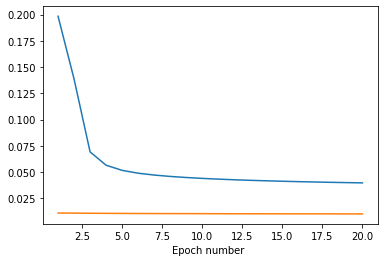

In [8]:
# with bias :

df_bias = scaled_df
df_bias["bias"] = -1

w_bias = Rand(df_bias.shape[1])

# Training:

e_lst_learn = []
for j in range(epoch):
    E = 0
    for i in range(n_learning):
        o = O(df_bias.iloc[i], w_bias, 'sigmoid')
        w_bias += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * df_bias.iloc[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
        print(E)
#         print(w)
        if(E > E_max):
            break
    e_lst_learn.append(E / n_learning)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst_learn)

# Test:

e_lst_test = []
for j in range(epoch):
    E = 0
    for i in range(n_learning, 569):
        o = O(df_bias.iloc[i], w_bias, 'sigmoid')
        w_bias += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * df_bias.iloc[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
        print(E)
#         print(w)
        if(E > E_max):
            break
    e_lst_test.append(E / n_learning)

plt.plot(iteration, e_lst_test)
plt.xlabel('Epoch number ')
# plt.grid()

In [9]:
len(e_lst_learn)

20